# Unsupervised learning

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

clustering_data = pd.read_csv("data/clustering_data.csv")
clustering_pca = pd.read_csv("data/clustering_pca_data.csv")

**Most of the code in this notebook is doubled - we are comparing PCA approach and plain data**

# Flat clustering - k-means with 2 clusters

In [5]:
# initialize k-means
kmeans = KMeans(n_clusters = 2, n_init = 'auto', random_state=1337)
kmeans_pca = KMeans(n_clusters=2, n_init='auto', random_state=1337)
# fit
kmeans.fit(clustering_data)
kmeans_pca.fit(clustering_pca)

KMeans(n_clusters=2, n_init='auto', random_state=1337)

In [7]:
# save the centroids for easier visualization
centers = kmeans.cluster_centers_
centers_pca = kmeans_pca.cluster_centers_

### Visualize

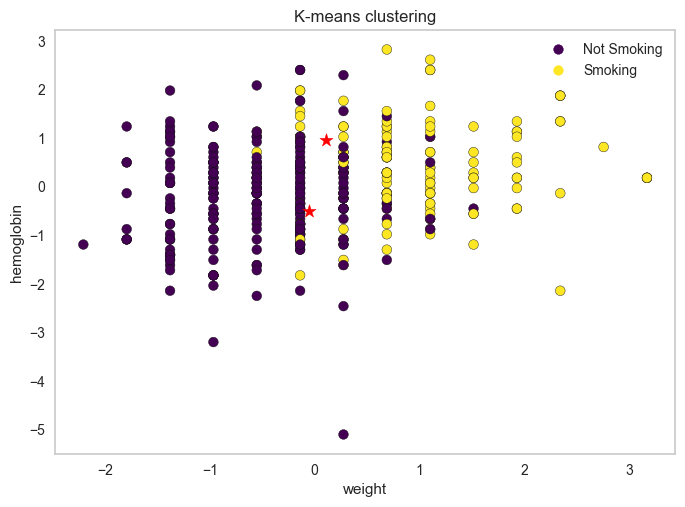

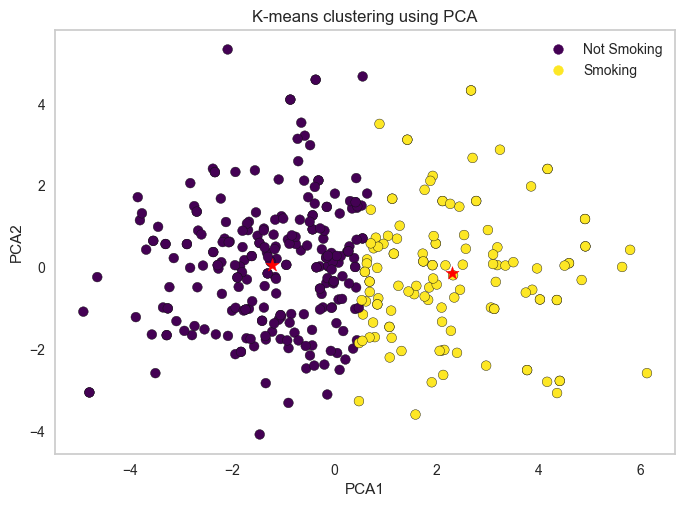

In [8]:
scatter1 = plt.scatter(x = clustering_data['weight(kg)'], y = clustering_data['hemoglobin'], c = kmeans.labels_, cmap = 'viridis', edgecolors='k')
plt.scatter(centers[:,0], centers[:,1], marker='*', s=100, c='red')
plt.title('K-means clustering')
plt.xlabel('weight')
plt.ylabel('hemoglobin')
plt.grid(False)
plt.legend(handles=scatter1.legend_elements()[0], labels=("Not Smoking","Smoking"))
plt.show()

scatter2 = plt.scatter(x = clustering_pca['pca1'],y =  clustering_pca['pca2'], c = kmeans_pca.labels_, cmap = 'viridis', edgecolors='k')
plt.scatter(centers_pca[:,0], centers_pca[:,1], marker='*', s=100, c='red')
plt.title('K-means clustering using PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(handles=scatter2.legend_elements()[0], labels=("Not Smoking", "Smoking"))
plt.grid(False)
plt.show()

### Elbow visualizer

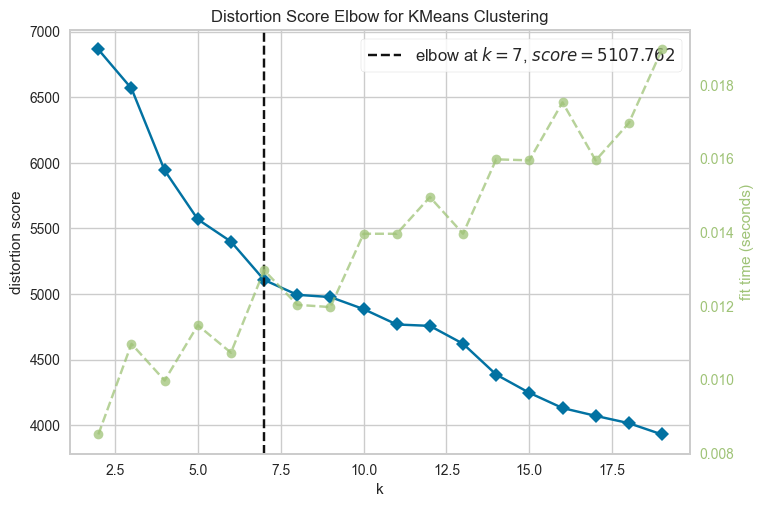

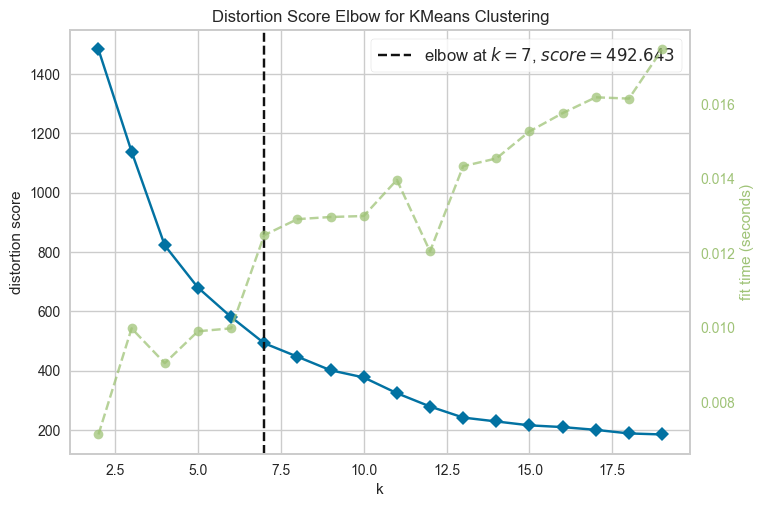

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
# initialize k-means
clusters = KMeans(max_iter = 500, n_init="auto", random_state=1337)
# create visualizer
visual = KElbowVisualizer(clusters, k = (2, 20))
visual.fit(clustering_data)
visual.show()

# repeat for PCA
clusters_pca = KMeans(max_iter = 500, n_init="auto", random_state=1337)
visual_pca = KElbowVisualizer(clusters_pca, k = (2, 20))
visual_pca.fit(clustering_pca)
visual_pca.show()

In [10]:
# initialize
kmeans_optim = KMeans(n_clusters=7, n_init='auto', random_state=1337)
kmeans_pca_optim = KMeans(n_clusters=7, n_init='auto', random_state=1337)

# fit
kmeans_optim.fit(clustering_data)
kmeans_pca_optim.fit(clustering_pca)

# save centers for easier visualizaion
centers = kmeans_optim.cluster_centers_
centers_pca = kmeans_pca_optim.cluster_centers_

### Evaluation

In [11]:
# silhouette score of the clusters built from data
print("silhouette score from data: ", silhouette_score(clustering_data, kmeans_optim.labels_))
# silhouette score of the principal components
print("silhouette score from pca: ", silhouette_score(clustering_pca, kmeans_pca_optim.labels_))

silhouette score from data:  0.07991328046964154
silhouette score from pca:  0.34527619883987787


### Visualization

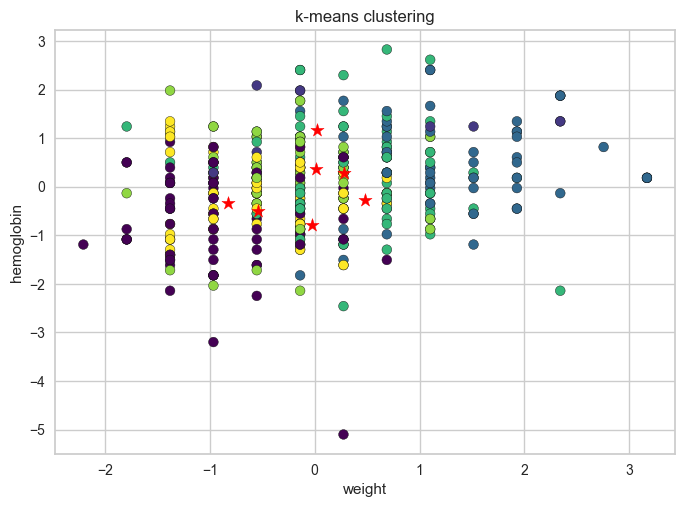

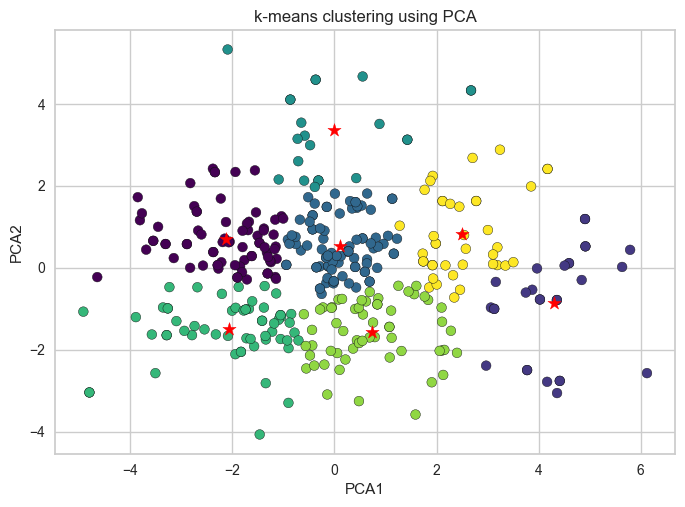

In [12]:
# visualize
plt.scatter(x = clustering_data['weight(kg)'],y =  clustering_data['hemoglobin'], c = kmeans_optim.labels_, cmap = 'viridis', edgecolors='k')
plt.scatter(centers[:,0], centers[:,1], marker='*', s=100, c='red')
plt.title('k-means clustering')
plt.xlabel('weight')
plt.ylabel('hemoglobin')
plt.show()

plt.scatter(x = clustering_pca['pca1'],y =  clustering_pca['pca2'], c = kmeans_pca_optim.labels_, cmap = 'viridis', edgecolors='k')
plt.scatter(centers_pca[:,0], centers_pca[:,1], marker='*', s=100, c='red')
plt.title('k-means clustering using PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# Hierarchical clustering

In [ ]:
# visualize both dendrograms
linkage_data = linkage(clustering_data, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

linkage_pca = linkage(clustering_pca, method='ward', metric='euclidean')
dendrogram(linkage_pca)
plt.show()

### Agglomerative clustering

In [13]:
# initialize clusters
clusters = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')

# assign data to clusters
predictions = clusters.fit_predict(clustering_data)
predictions_pca = clusters.fit_predict(clustering_pca)

### Evaluation

In [14]:
# silhouette score of the clusters built from data
print("silhouette score from data: ", silhouette_score(clustering_data, predictions))
# silhouette score of the principal components
print("silhouette score from pca: ", silhouette_score(clustering_pca, predictions_pca))

silhouette score from data:  0.16635213173645688
silhouette score from pca:  0.33104055538649974


### visualization

In [15]:
#add cluster predictions to data
clustering_data['predictions'] = predictions
clustering_pca['predictions'] = predictions_pca
clustering_pca

,pca1,pca2,predictions
0,-1.344923,-1.749165,1
1,0.385150,0.238137,0
2,-1.133579,0.217776,1
3,-2.007626,-1.046821,1
4,-0.594788,2.124993,0
...,...,...,...
366,-1.418710,-1.292505,1
367,1.587550,-3.580762,0
368,-0.013114,-0.329391,0
369,0.432734,0.683308,0


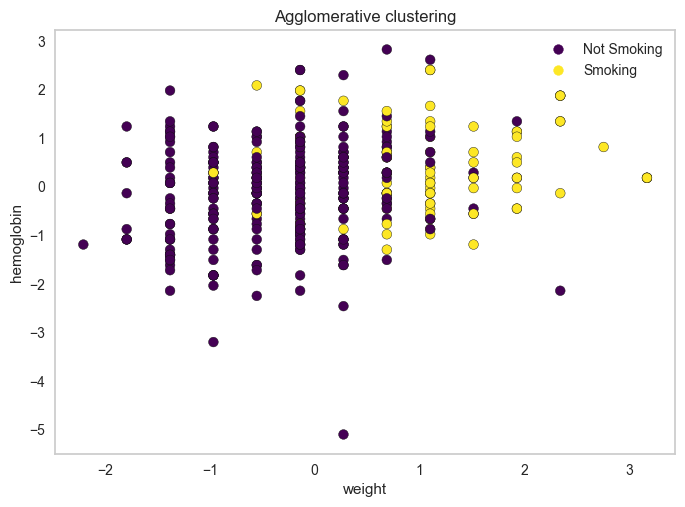

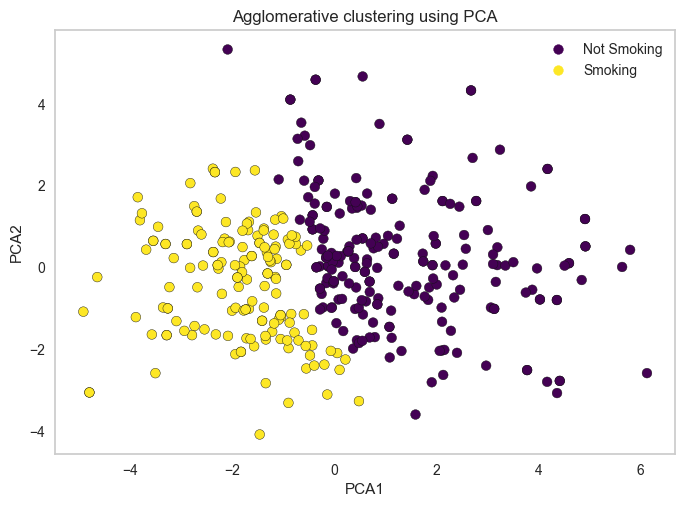

In [17]:
# draw plots
scatter1 = plt.scatter(x = clustering_data['weight(kg)'],y =  clustering_data['hemoglobin'], c = clustering_data['predictions'], cmap = 'viridis', edgecolors='k')
plt.title('Agglomerative clustering')
plt.xlabel('weight')
plt.ylabel('hemoglobin')
plt.grid(False)
plt.show()

scatter2 = plt.scatter(x = clustering_pca['pca1'], y = clustering_pca['pca2'], c = clustering_pca['predictions'], cmap = 'viridis', edgecolors='k')
plt.title('Agglomerative clustering using PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(False)
plt.show()